In [10]:
'''
This section imports all the modules and 
definitions I commonly use thrroughout most 
notebooks
'''

import sys
sys.path.append('../libraries/')
from libraries_and_definitions import *

# Carnot Efficiency

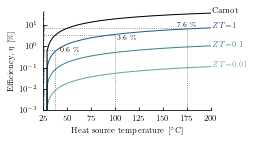

In [11]:
#data import
efficiency_frame = pd.read_csv("data/Efficiency_frame.csv",index_col=0, header=0)
# efficiency_frame = pd.read_csv("Chapter_1/Efficiency_frame.csv",index_col=0, header=0)
efficiency_melt=pd.melt(efficiency_frame, 
        id_vars=['Carnot'], #Column(s) to use as identifier variables.
        var_name='ZT', # Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
        value_name='ZT_value', # Name to use for the ‘value’ column.
        ignore_index=False
       )
efficiency_melt=efficiency_melt.reset_index()

# setting the whole figure dimensions
fig = plt.figure(figsize=(3,1.8))

# setting up a subplot within the figure (rows,columns,position)
ax1 = fig.add_subplot(1, 1, 1, ) # yticklabels=[], yticks=[],xticklabels=[], xticks=[]) 


sns.lineplot(data=efficiency_melt, x='Temperature[C]',y='ZT_value', hue='ZT',lw=1 ,palette='crest',ls='-',zorder=0,ax=ax1,legend=False )
sns.lineplot(data=efficiency_melt, x='Temperature[C]',y='Carnot', lw=1 ,color='k',ls='-',zorder=0,ax=ax1 )

crest=sns.color_palette("crest", as_cmap=True)


ax1.annotate("$ZT$=0.01", xy=(1.01, 0.44), xycoords="axes fraction", fontsize=7.8,color=crest(0.2))
ax1.annotate("$ZT$=0.1", xy=(1.01, 0.65), xycoords="axes fraction", fontsize=7.8,color=crest(0.5))
ax1.annotate("$ZT$=1", xy=(1.01, 0.84), xycoords="axes fraction", fontsize=7.8,color=crest(0.95))
ax1.annotate("Carnot", xy=(1.01, 1), xycoords="axes fraction", fontsize=7.8,color='k')

ax1.vlines(100,1E-3,3.6E0,ls=':',lw=0.8,color='dimgray',zorder=-1)
ax1.hlines(3.6E0,0,100,ls=':',lw=0.8,color='dimgray',zorder=-1)

ax1.vlines(37,7E-4,6.7E-1,ls=':',lw=0.8,color='dimgray',zorder=-1)
ax1.hlines(6.5E-1,0,37,ls=':',lw=0.8,color='dimgray',zorder=-1)

ax1.vlines(175,7E-4,7.6E0,ls=':',lw=0.8,color='dimgray',zorder=-1)
ax1.hlines(7.6E0,0,175,ls=':',lw=0.8,color='dimgray',zorder=-1)


ax1.annotate("0.6 $\%$", xy=(42, 5E-1), xycoords="data", fontsize=7,color='k')
ax1.annotate("3.6 $\%$", xy=(102, 2E0), xycoords="data", fontsize=7,color='k')
ax1.annotate("7.6 $\%$", xy=(165, 8.2E0), xycoords="data", fontsize=7,color='k')


ax1.set_yscale('log')
ax1.set_ylim(1E-3,40)
ax1.set_xlim(25,200)
ax1.set_xlabel('Heat source temperature [$^\circ$C]')
ax1.set_ylabel('Efficiency, $\eta$ [$\%$]')




plt.subplots_adjust(
    wspace = 0.2,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2  # the amount of height reserved for space between subplots,
)

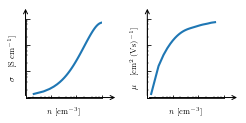

In [6]:
n_sigma = pd.read_csv("data/n_sigma.csv",index_col=None, header=None) 
n_mu = pd.read_csv("data/n_mu.csv",index_col=None, header=None) 

# figure frame
fig = plt.figure(figsize=(3.5,1.8))
ax1 = fig.add_subplot(1, 2, 1, zorder=100) 
ax2 = fig.add_subplot(1, 2, 2, zorder=100 ) 
axins1 = ax1.inset_axes([0., 0., 1, 1]) #
axins1.patch.set_alpha(0.1)
axins2 = ax2.inset_axes([0.0, 0., 1, 1]) #
axins2.patch.set_alpha(0.1)
axins1.axis('off')
axins2.axis('off')
axins1.set_xscale('log')
axins1.set_yscale('log')
axins2.set_xscale('log')
axins2.set_yscale('log')
axins1.set_xlim(8E-4,1.1E-1)
axins2.set_xlim(8E-4,1.1E-1)


sns.regplot(x=n_sigma[0],y=n_sigma[1], ax=axins1,
                scatter_kws={'s':0}, order=5, ci=0
               )
sns.regplot(x=n_mu[0],y=n_mu[1], ax=axins2,
                scatter_kws={'s':0}, order=8, ci=0
               )


ax1.annotate('',
            xy=(0.0, 0), xycoords='axes fraction',
            xytext=(1.2,0), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-",
                            lw=1, color='k'), zorder=-50, fontsize=10)
ax1.annotate('',
            xy=(0.0, 0), xycoords='axes fraction',
            xytext=(0,1.15), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-",
                            lw=1, color='k'), zorder=-50, fontsize=10)
ax2.annotate('',
            xy=(0.0, 0), xycoords='axes fraction',
            xytext=(1.2,0), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-",
                            lw=1, color='k'), zorder=-50, fontsize=10)
ax2.annotate('',
            xy=(0.0, 0), xycoords='axes fraction',
            xytext=(0,1.15), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<-",
                            lw=1, color='k'), zorder=-50, fontsize=10)

for axes in [ax1.axes, ax2.axes]:
    axes.set_yscale('log')
    axes.set_xscale('log')
    axes.set_xlim(1E-3,1E-0)
    axes.set_ylim(1E-3,1E-0) 
    axes.set_xlabel('$n$ [cm$^{-3}$]',fontsize=8)
#     axes.xaxis.set_major_locator(plt.MaxNLocator(5))  
    axes.set_yticklabels([])
    axes.set_xticklabels([]) 
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=4)
    axes.yaxis.set_minor_locator(locmin)
    axes.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    locmin2 = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=4)
    axes.xaxis.set_minor_locator(locmin2)
    axes.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.set_ylabel('$\sigma\quad [\mathrm{S\,cm}^{-1}]$')
ax2.set_ylabel('$\mu\quad [\mathrm{cm}^2\,\mathrm{(Vs)}^{-1}]$')

plt.tight_layout()
# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/chapter_1/sigma_n.pdf', bbox_inches='tight')
    

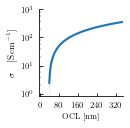

In [7]:
# figure frame
fig = plt.figure(figsize=(1.5,1.6))
ax1 = fig.add_subplot(1, 1, 1, ) 


x= [40,43,55,132,221,349]
y=[1.9,3.5,13,115,220,349]

sns.regplot(x,y, ax=ax1, scatter_kws={'s':0})

for axes in [ax1.axes]:
    axes.set_yscale('log')
    axes.set_xlim(-2,350)
    axes.set_ylim(8E-1,1E3) 
    axes.set_xlabel('OCL [nm]',fontsize=8)
    axes.set_ylabel('$\sigma\quad [\mathrm{S\,cm}^{-1}]$', fontsize=9)
    axes.xaxis.set_major_locator(plt.MaxNLocator(5))  
#     axes.set_yticklabels([])
#     axes.set_xticklabels([]) 

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=4)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# plt.tight_layout()
    

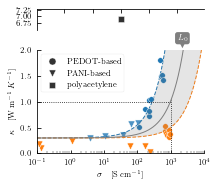

In [10]:
'''
Data import, the data was compiled from the specified references (in DOI)
'''
k_doi1 = pd.read_csv("data/Kappa_DOI_10.1002_adma.201404738.csv",index_col=None, header=None) 
pani1 = pd.read_csv("data/PANI_10.1023_A_1020612123826.csv",index_col=None, header=None, skiprows=2) #DOI : 10.1016/0379-6779(91)91162
pani2 = pd.read_csv("data/PANI_DOI_10.1016_0379-6779_91_91162-4.csv",index_col=None, header=None, skiprows=1) #DOI : 10.1023/A:1020612123826
k_doi2 = pd.read_csv("data/Kappa_DOI_10.1038_nmat3635.csv",index_col=None, header=None) # DOI : 10.1038_nmat3635.csv

fig = plt.figure(figsize=(3,1.9))
ax1 = fig.add_subplot(1, 1, 1, ) 
axins = ax1.inset_axes([0, 1.2, 1, 0.2]) #
axins.patch.set_alpha(0.1)


delta = 1000
x = np.logspace(-1, 4, delta) #x range
y = np.linspace(-3, 3, delta)     #y range
X, Y = np.meshgrid(x, y)

sigma=x*100 # [S/cm] or ohm^-1 cm^-1
T=300 # [K]
kl=0.3 # [K]
Lorenz= 2.44E-8# [W ohm K^-2]
ke=sigma*Lorenz*T # [ohm^-1 m^-1] [k]   [W ohm K^-2]
kea=sigma*(Lorenz*3.5)*T# [ohm^-1 m^-1] [k]   [W ohm K^-2]
keb=sigma*(Lorenz/3.5)*T# [ohm^-1 m^-1] [k]   [W ohm K^-2]

kappa=(ke+kl)
kappaa=(kea+kl)
kappab=(keb+kl)

ax1.plot(x,kappa,lw=1, c='tab:gray')
ax1.plot(x,kappaa,lw=1, c='tab:blue', ls='--',zorder=-1)
ax1.plot(x,kappab,lw=1, c='tab:orange',ls='--',zorder=-1)

ax1.vlines(1E3, 0,1.05, lw=0.8, ls=':', color='k')
ax1.hlines(1, 0,1000, lw=0.8, ls=':', color='k')

#### plots from literature for comparison 
# ax1.plot(mariano[0],(1/mariano[1]), c='y' ) 
sns.scatterplot(k_doi1[0],k_doi1[1],ax=ax1, color='tab:blue')
sns.scatterplot(k_doi2[0],k_doi2[1],ax=ax1, color='tab:orange')
# sns.scatterplot(polyaniline[0],polyaniline[1] ,ax=ax1, color='tab:purple')
sns.scatterplot(pani1[0],pani1[1],ax=ax1,color='tab:orange', zorder=-5,marker='v', s=50)
sns.scatterplot(pani2[1],pani2[0],ax=ax1,color='tab:blue',zorder=-4, marker='v', alpha=0.8, s=50)

sns.scatterplot(x=[-100],y=[100],ax=ax1,color='k',zorder=-4, marker='o', alpha=0.8, s=50, label='PEDOT-based')
sns.scatterplot(x=[-100],y=[100],ax=ax1,color='k',zorder=-4, marker='v', alpha=0.8, s=50, label='PANI-based')
sns.scatterplot(x=[-100],y=[100],ax=ax1,color='k',zorder=-4, marker='s', alpha=0.8, s=40, label='polyacetylene')

#############
sns.scatterplot(x=[270],y=[6.9],ax=axins,color='k',zorder=-4, marker='s', alpha=0.8, s=40, label='')
axins.set_xticklabels([]) 


axins.spines['bottom'].set_visible(False)
axins.spines['top'].set_visible(True)
axins.xaxis.tick_top() 

annotate(ax1,2.2E3,2.5,'$L_0$',fc='tab:gray',y0=2)

ax1.fill_between(x, (kappaa), (kappab), color='tab:gray', alpha=.2)

for axes in [ax1.axes]:
    axes.set_xscale('log')
#     axes.set_yscale('log')
    axes.set_xlim(1E-1,1E4)
    axes.set_ylim(0.,2)
    axes.set_ylabel('$\kappa\quad [\mathrm{W}\,\mathrm{m}^{-1}\,K^{-1}]$')
    axes.set_xlabel('$\sigma\quad[\mathrm{S}\,\mathrm{cm}^{-1}]$')

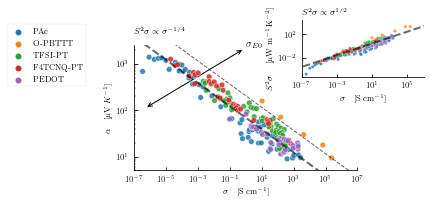

In [12]:
# Data import
reference_values = pd.read_csv("data/melt_sigma_s_reference_values.csv",index_col=None, header=0) 
pedot = pd.read_csv("data/PEDOT_DOI_10.1038_s41598-020-64951-z.csv",index_col=None, header=None) 

fig = plt.figure(figsize=(4,2.3))
ax1 = fig.add_subplot(1, 1, 1,)
# ax2 = fig.add_subplot(1, 1, 1,)



x=np.logspace(-8,8,100) # in ohms^-1 cm^-1
y=np.logspace(1,4,100) # in uV cm^-1

sigma=x
Seebeck= teu*((x)/1)**(-1/4)


def ulaw_Glaudell(x):
    return teu*((x)/0.00001)**(-1/4)
def ulaw_Glaudell_2(x):
    return teu*((x)/0.001)**(-1/4)
def ulaw_PF_Glaudell(x):
    return teu*((x)/1E4)**(1/2)  #Glaudell universal power law for thermoelectrics

def ulaw_S_Glaudell(x):
    return (teu*((x)/4E-5)**(-1/4))*10  #Glaudell universal power law for thermoelectrics
def ulaw_S_Glaudell_2(x):
    return (teu*((x)/3.2E-3)**(-1/4))*10 

ulaw= ulaw_Glaudell(x)

# ax1.plot(sigma,Seebeck)
ax1.plot(x,ulaw_S_Glaudell(x), color='k', lw=2, ls='--',zorder=10, alpha=0.6)
ax1.plot(x,ulaw_S_Glaudell_2(x), color='k', lw=1, ls='--',zorder=10, alpha=0.6)

#### this plots the reference data 
sns.scatterplot(data=reference_values, x='sigma', y='Seebeck', hue='Material', legend=True,
#                 style='Family',
                alpha=0.85)







################# placing the inset
axins = ax1.inset_axes([0.75, 0.75, 0.55, 0.45]) #
axins.patch.set_alpha(0.1)
axins.plot(x,ulaw_PF_Glaudell(x), color='k', lw=2, ls='--',zorder=10, alpha=0.6)
sns.scatterplot(data=reference_values, x='sigma', y='power factor', hue='Material', legend=False,
#                 style='Family',
                alpha=0.8, ax=axins, s=10)

axins.set_xscale('log')
axins.set_yscale('log')
axins.set_xlim(1E-7,1E7)
axins.set_xlabel('$\sigma\quad[\mathrm{S}\,\mathrm{cm}^{-1}]$')
axins.set_ylabel('$S^2\sigma\quad$ [$\mu$W m$^{-1} $K$^{-2}$]')

####### limits

for axes in [ax1.axes, ax2.axes]:
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlim(1E-7,1E7)
    axes.set_xlabel('$\sigma\quad[\mathrm{S}\,\mathrm{cm}^{-1}]$')

for axes in [ax1.axes]:
    axes.set_ylim(5,2500)
    axes.set_ylabel('$\\alpha\quad[\mu\mathrm{V}\,K^{-1}]$')
    
##### legends

# ax1.legend(bbox_to_anchor=(1.7,1.2))
ax1.legend(bbox_to_anchor=(-0.2,1.2))

font = mpfm.FontProperties(family='Roboto Slab',weight='regular', size=15)

# annotations
# annotate(ax1,1E-6,2500,'$S^2\sigma=\\frac{K_{\mathrm{B}}}{e}\,\\frac{\sigma}{\sigma_\\alpha}$', fc='gray', y0=2000)
# ax1.annotate('$S^2\sigma=\\frac{K_{\mathrm{B}}}{e}\,(\\frac{\sigma}{\sigma_\\alpha})^{-1/4}$',
#             xy=(0., 1.1), xycoords="axes fraction", fontsize=8.5, color= 'k', zorder=1)
ax1.annotate('$S^2\sigma\propto\sigma^{-1/4}$',
            xy=(0., 1.1), xycoords="axes fraction", fontsize=8.5, color= 'k', zorder=1)
axins.annotate('$S^2\sigma\propto\sigma^{1/2}$',
            xy=(0., 1.1), xycoords="axes fraction", fontsize=8.5, color= 'k', zorder=1)



ax1.annotate('$\sigma_{E0}$',
            xy=(0.05, 0.5), xycoords='axes fraction',
            xytext=(0.5,1), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="<->",
                            lw=1, color='k'), zorder=0, fontsize=10);